### 2. Imagine an IoT-based smart home system that dynamically optimizes energy usage across multiple devices (e.g., air conditioner, heater, and lights). Each device has a varying energy consumption efficiency based on real-time environmental factors like temperature or occupancy. Design an UCB algorithm is used to determine which device settings (e.g., energy modes) should be prioritized to maximize energy efficiency and implement the algorithm in Python.

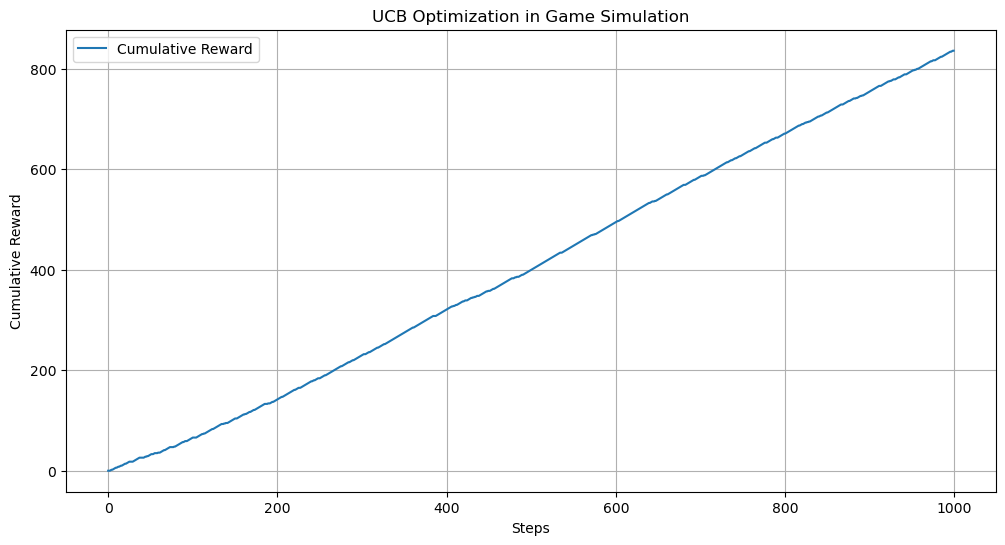

Action counts: [ 15.  22.  44. 128. 791.]
True reward probabilities: [0.1, 0.3, 0.5, 0.7, 0.9]


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
class UCB:
    def __init__(self, n_actions):
        self.n_actions = n_actions
        self.action_counts = np.zeros(n_actions) 
        self.action_rewards = np.zeros(n_actions)  

    def select_action(self, step):

        if step < self.n_actions:
            return step 
        
        ucb_values = [
            (self.action_rewards[i] / (self.action_counts[i] + 1e-5)) +  
            math.sqrt(2 * math.log(step + 1) / (self.action_counts[i] + 1e-5))
            for i in range(self.n_actions)
        ]
        return np.argmax(ucb_values)

    def update(self, action, reward):
        self.action_counts[action] += 1
        self.action_rewards[action] += reward


def simulate_game(n_steps, n_actions, true_reward_probs):
    ucb = UCB(n_actions)
    total_reward = 0
    rewards = []

    for step in range(n_steps):
        action = ucb.select_action(step)
        # Simulate reward based on the true probability of the chosen action
        reward = 1 if np.random.rand() < true_reward_probs[action] else 0
        ucb.update(action, reward)
        total_reward += reward
        rewards.append(total_reward)

    return rewards, ucb.action_counts


n_steps = 1000  
n_actions = 5  
true_reward_probs = [0.1, 0.3, 0.5, 0.7, 0.9]  


rewards, action_counts = simulate_game(n_steps, n_actions, true_reward_probs)


plt.figure(figsize=(12, 6))
plt.plot(rewards, label="Cumulative Reward")
plt.xlabel("Steps")
plt.ylabel("Cumulative Reward")
plt.title("UCB Optimization in Game Simulation")
plt.legend()
plt.grid(True)
plt.show()

print("Action counts:", action_counts)
print("True reward probabilities:", true_reward_probs)


### 1. Implement Upper-Confidence bound algorithm (UCB) in Multi Arm Banding Problem to optimize player rewards in a basic game simulation with Python Program.
### The game scenario involves a player choosing between different "actions" (like doors, treasures, or paths), each with a hidden reward probability. The UCB algorithm must help the game adapt dynamically to maximize the player's experience.



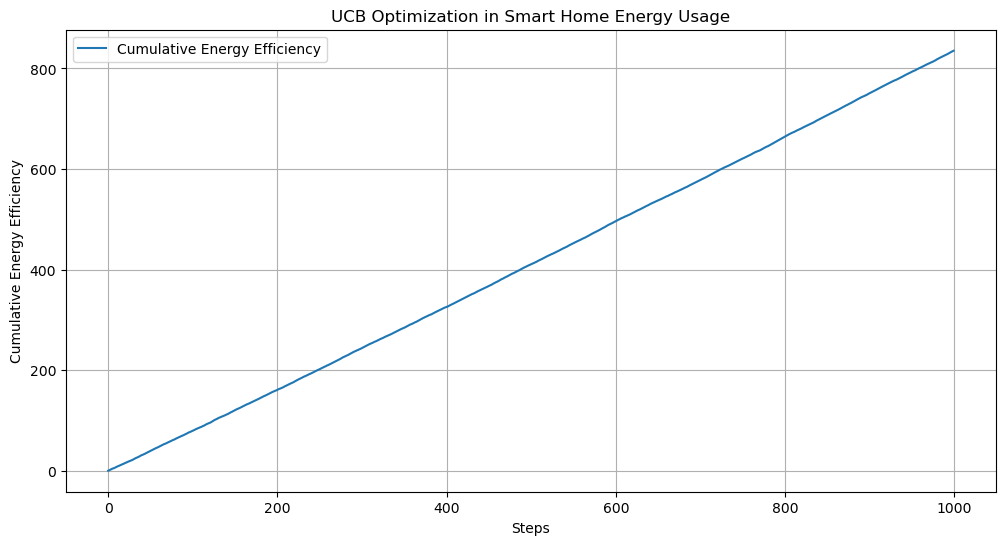

Mode counts: [ 65. 112. 223. 600.]
True mode efficiencies: [0.6, 0.7, 0.8, 0.9]


In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
class UCB:
    def __init__(self, n_modes):
        self.n_modes = n_modes
        self.mode_counts = np.zeros(n_modes)  
        self.mode_rewards = np.zeros(n_modes) 

    def select_mode(self, step):
   
        if step < self.n_modes:
            return step 

        ucb_values = [
            (self.mode_rewards[i] / (self.mode_counts[i] + 1e-5)) +
            math.sqrt(2 * math.log(step + 1) / (self.mode_counts[i] + 1e-5))
            for i in range(self.n_modes)
        ]
        return np.argmax(ucb_values)

    def update(self, mode, reward):
        
        self.mode_counts[mode] += 1
        self.mode_rewards[mode] += reward


def simulate_smart_home(n_steps, n_modes, true_efficiency):
    ucb = UCB(n_modes)
    total_efficiency = 0
    efficiencies = []

    for step in range(n_steps):
        mode = ucb.select_mode(step)
        efficiency = np.random.normal(loc=true_efficiency[mode], scale=0.1)
        ucb.update(mode, efficiency)
        total_efficiency += efficiency
        efficiencies.append(total_efficiency)

    return efficiencies, ucb.mode_counts


n_steps = 1000  
n_modes = 4 
true_efficiency = [0.6, 0.7, 0.8, 0.9] 

efficiencies, mode_counts = simulate_smart_home(n_steps, n_modes, true_efficiency)


plt.figure(figsize=(12, 6))
plt.plot(efficiencies, label="Cumulative Energy Efficiency")
plt.xlabel("Steps")
plt.ylabel("Cumulative Energy Efficiency")
plt.title("UCB Optimization in Smart Home Energy Usage")
plt.legend()
plt.grid(True)
plt.show()


print("Mode counts:", mode_counts)
print("True mode efficiencies:", true_efficiency)


#### 3. Develop a Chess-like game using PAC (Probably approximately correct) algorithm where the problem set-up is as follows:



### Problem Setup
### i) Game Environment: Simplify chess to a smaller grid with basic pieces (like pawns and a king).
#### ii) PAC Learning: Train a model to approximate a move policy that is "probably approximately correct" (i.e., likely correct within some error bounds).
#### iii) Implementation Goals: Use supervised learning to train a model with a dataset of board states and corresponding optimal moves.

Implementation:

### 1. The chess-like game will have a simplified 4x4 board with only a king and a few pawns.


### 2. PAC learning will train a simple classifier (e.g., decision tree) to predict moves.

In [7]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import random

class ChessBoard:
    def __init__(self):
        self.board = np.zeros((4, 4), dtype=int)  
        self.king_pos = (3, 0) 
        self.pawn_positions = [(0, 1), (1, 3), (2, 2)]  
        self.place_pieces()

    def place_pieces(self):
        self.board[self.king_pos] = 1 
        for pos in self.pawn_positions:
            self.board[pos] = -1 

    def get_features(self):
     
        return self.board.flatten()

    def move_king(self, new_pos):
        x, y = self.king_pos
        self.board[x, y] = 0 
        self.king_pos = new_pos
        x, y = new_pos
        self.board[x, y] = 1 

    def is_valid_move(self, pos):
        x, y = pos
        return 0 <= x < 4 and 0 <= y < 4 and self.board[x, y] != 1 

    def generate_king_moves(self):
        x, y = self.king_pos
        moves = [(x + i, y + j) for i in [-1, 0, 1] for j in [-1, 0, 1] if (i, j) != (0, 0)]
        return [move for move in moves if self.is_valid_move(move)]


def reward_function(board, move):
    x, y = move
    if board[x, y] == -1: 
        return 10
    else: 
        return 1


def generate_training_data(n_samples):
    X = []
    y = []
    for _ in range(n_samples):
        board = ChessBoard()
        moves = board.generate_king_moves()
        optimal_move = None
        max_reward = -np.inf
        for move in moves:
            reward = reward_function(board.board, move)
            if reward > max_reward:
                max_reward = reward
                optimal_move = move
        X.append(board.get_features())
        y.append(optimal_move)
    return np.array(X), np.array(y)

def train_pac_model(X, y):
    y_flat = [x * 4 + y for x, y in y]
    model = DecisionTreeClassifier(max_depth=5)
    model.fit(X, y_flat)
    return model

def predict_move(model, board):
    move_flat = model.predict([board.get_features()])[0]
    return divmod(move_flat, 4)
def simulate_game(model, n_steps=10):
    board = ChessBoard()
    for step in range(n_steps):
        print(f"Step {step + 1}:")
        print(board.board)
        move = predict_move(model, board)
        print(f"King moves to: {move}")
        board.move_king(move)

if __name__ == "__main__":
    X, y = generate_training_data(500)

    model = train_pac_model(X, y)

    y_flat = [x * 4 + y for x, y in y]
    predictions = model.predict(X)
    print(f"Model Accuracy: {accuracy_score(y_flat, predictions) * 100:.2f}%")


    simulate_game(model)


Model Accuracy: 100.00%
Step 1:
[[ 0 -1  0  0]
 [ 0  0  0 -1]
 [ 0  0 -1  0]
 [ 1  0  0  0]]
King moves to: (2, 0)
Step 2:
[[ 0 -1  0  0]
 [ 0  0  0 -1]
 [ 1  0 -1  0]
 [ 0  0  0  0]]
King moves to: (2, 0)
Step 3:
[[ 0 -1  0  0]
 [ 0  0  0 -1]
 [ 1  0 -1  0]
 [ 0  0  0  0]]
King moves to: (2, 0)
Step 4:
[[ 0 -1  0  0]
 [ 0  0  0 -1]
 [ 1  0 -1  0]
 [ 0  0  0  0]]
King moves to: (2, 0)
Step 5:
[[ 0 -1  0  0]
 [ 0  0  0 -1]
 [ 1  0 -1  0]
 [ 0  0  0  0]]
King moves to: (2, 0)
Step 6:
[[ 0 -1  0  0]
 [ 0  0  0 -1]
 [ 1  0 -1  0]
 [ 0  0  0  0]]
King moves to: (2, 0)
Step 7:
[[ 0 -1  0  0]
 [ 0  0  0 -1]
 [ 1  0 -1  0]
 [ 0  0  0  0]]
King moves to: (2, 0)
Step 8:
[[ 0 -1  0  0]
 [ 0  0  0 -1]
 [ 1  0 -1  0]
 [ 0  0  0  0]]
King moves to: (2, 0)
Step 9:
[[ 0 -1  0  0]
 [ 0  0  0 -1]
 [ 1  0 -1  0]
 [ 0  0  0  0]]
King moves to: (2, 0)
Step 10:
[[ 0 -1  0  0]
 [ 0  0  0 -1]
 [ 1  0 -1  0]
 [ 0  0  0  0]]
King moves to: (2, 0)
